
## What about the price?


<ul>
<li><a href="#bu">1. Business Understanding.</a></li>
<li><a href="#du">2. Data Understanding.</a></li>    
<li><a href="#dp">3. Prepare Data.</a></li>
<li><a href="#md">4. Model Data</a></li>
<li><a href="#r">5. Results</a></li>
</ul>

<a id='bu'></a>
# 1. Business Understanding

Hi All!
Welcome to the second part of your analysis!

Today we are going to take a look at "Boston Airbnb Open Data". The data has been downloaded from Kaggle.com, "Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Boston, MA". The dataset has three parts:

1. Listings, including full descriptions and average review score
2. Reviews, including a unique id for each reviewer and detailed comments
3. Calendar, including listing id and the price and availability for that day

For our analysis, we are going to use Listings dataset. The project contains three notebooks, and each one of them exploring different questions:

1. The 1st notebook is about the hosts, trying to answer the questions above
2. In the 2nd will explore the price, and how is affected by location, property type, room type and bed type
3. And in the last notebook, we will try to build a model so we can predict the price.

In this notebook we will try to answer some questions related to price:

1. How location affecting the price?
2. What property types are the most expensive and the cheapest?
3. The price is related to room type?
4. How the bed type is connected to price?

<a id='du'></a>
# 2. Data Understanding

Here we used the Boston AirBnb data to attempt to answer our questions of interest. In this case, using the data to help us arrive at our questions of interest. The complete dataset has three CSV files, we used listing CSV to answer our question since it contains much more information regarding listings, hosts, price, location.
A brief explanation for the columns:

street: The street where the listing is located

neighbourhood_cleansed: Available neighbourhood

latitude, longitude: The exact position of the listing, it will help to create a map

property_type: What type is the property

room_type: The type of room available

bed_type: What types of bed are in the property

<a id='dp'></a>
# 3. Prepare Data

In [134]:
# Import libraries
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plotting library
import folium
# module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim

In [135]:
# Read csv to pandas
listings = pd.read_csv('./listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [136]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

We are going to keep only the columns that are helpful to answer our questions.

In [137]:
# Create new dataframe with the columns we are keeping 
listings_price = listings[['street', 'neighbourhood_cleansed', 'latitude', 'longitude',  'property_type', 'room_type', 'bed_type', 'price']]
listings_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   street                  3585 non-null   object 
 1   neighbourhood_cleansed  3585 non-null   object 
 2   latitude                3585 non-null   float64
 3   longitude               3585 non-null   float64
 4   property_type           3582 non-null   object 
 5   room_type               3585 non-null   object 
 6   bed_type                3585 non-null   object 
 7   price                   3585 non-null   object 
dtypes: float64(2), object(6)
memory usage: 224.2+ KB


In [138]:
listings_price['price'].value_counts()

$150.00    144
$200.00    117
$100.00    101
$250.00     95
$75.00      94
          ... 
$256.00      1
$725.00      1
$242.00      1
$297.00      1
$217.00      1
Name: price, Length: 324, dtype: int64

The price column is an objct type column and contains symbols, let's fix that.

In [139]:
# Clean price column from symbols and change the dtype
listings_price = listings_price.copy()
listings_price['price'] = listings_price['price'].map(lambda x: x.lstrip('$').rstrip('00'))
listings_price['price'] = listings_price['price'].str.replace(',', '').str.replace('.', '')
listings_price['price'] = listings_price['price'].astype(float)
listings_price['price'].value_counts()

150.0    144
200.0    117
100.0    101
250.0     95
75.0      94
        ... 
241.0      1
211.0      1
132.0      1
599.0      1
999.0      1
Name: price, Length: 324, dtype: int64

<a id='md'></a>
# 4. Model Data


## Price and Location

In [140]:
# Create the dataframe for hosts with above 50 listing
listings_price_loc = listings_price[['street', 'neighbourhood_cleansed', 'latitude', 'longitude', 'price']]
listings_price_loc

,street,neighbourhood_cleansed,latitude,longitude,price
0,"Birch Street, Boston, MA 02131, United States",Roslindale,42.282619,-71.133068,250.0
1,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,42.286241,-71.134374,65.0
2,"Ardale St., Boston, MA 02131, United States",Roslindale,42.292438,-71.135765,65.0
3,"Boston, MA, United States",Roslindale,42.281106,-71.121021,75.0
4,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,42.284512,-71.136258,79.0
...,...,...,...,...,...
3580,"Washington Street, Somerville, MA 02143, Unite...",Charlestown,42.380968,-71.083795,69.0
3581,"Freeman Street, Brookline, MA 02446, United St...",Allston,42.347503,-71.118336,150.0
3582,"Child Street, Cambridge, MA 02141, United States",Charlestown,42.371771,-71.071300,198.0
3583,"George St Somerville, Somerville, MA 02145, Un...",Charlestown,42.385226,-71.080923,65.0


In [141]:
# Descriptive Statistics 
listings_price_loc.describe()

,latitude,longitude,price
count,3585.000000,3585.000000,3585.000000
mean,42.340032,-71.084818,173.925802
std,0.024403,0.031565,148.331321
min,42.235942,-71.171789,10.000000
25%,42.329995,-71.105083,85.000000
50%,42.345201,-71.078429,150.000000
75%,42.354685,-71.062155,220.000000
max,42.389982,-71.000100,4000.000000


The only column is the price that has some statistics to show us. The mean price is 173 US dollars, the minimum price is 10 and the maximum price is 4000 US dollars.

In [142]:
# Creare the datafame for the 5 cheapest listings  
bottom_five = listings_price_loc.nsmallest(5,'price')
bottom_five

,street,neighbourhood_cleansed,latitude,longitude,price
2033,"Boston, MA, United States",Downtown,42.360424,-71.061496,10.0
3468,"Walbridge Street, Boston, MA 02134, United States",Allston,42.348018,-71.136071,11.0
471,"Burney Street, Roxbury Crossing, MA 02120, Uni...",Mission Hill,42.331024,-71.098539,20.0
3450,"Blaine Street, Boston, MA 02134, United States",Allston,42.356144,-71.137121,20.0
267,"Rockvale Circle, Boston, MA 02130, United States",Jamaica Plain,42.307311,-71.103397,22.0


In [143]:
# Creare the datafame for the 5 most expensive listings 
top_five = listings_price_loc.nlargest(5,'price')
top_five

,street,neighbourhood_cleansed,latitude,longitude,price
2285,"Commonwealth Avenue, Boston, MA 02215, United ...",Fenway,42.347934,-71.097580,4000.0
3055,"Congress Street, Boston, MA 02210, United States",South Boston Waterfront,42.348358,-71.039875,3000.0
793,"Columbus Avenue, Boston, MA 02118, United States",Roxbury,42.338626,-71.083315,1400.0
2204,"Edgerly Road, Boston, MA 02115, United States",Fenway,42.345201,-71.088918,1372.0
1950,"Myrtle Street, unit, Boston, MA 02114, United ...",Beacon Hill,42.358363,-71.068408,1345.0


In [144]:
address = 'Boston, US, USA'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Boston, US, USA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Boston, US, USA are 42.3602534, -71.0582912.


In [145]:
# create map of Boston using latitude and longitude values for the 5 most expensive listings
map_boston_top = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood, street, price in zip(top_five['latitude'], top_five['longitude'], top_five['neighbourhood_cleansed'], top_five['street'], top_five['price']):
    label = '{}, {}, {}'.format(neighborhood, street, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_boston_top)  
map_boston_top

In [146]:
# create map of Boston using latitude and longitude values for the 5 cheapest listings
map_boston_bot = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood, street, price in zip(bottom_five['latitude'], bottom_five['longitude'], bottom_five['neighbourhood_cleansed'], bottom_five['street'], bottom_five['price']):
    label = '{}, {}, {}'.format(neighborhood, street, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_boston_bot)  
map_boston_bot

In [147]:
map_boston_bot.save('bottom_map.html')

In [148]:
map_boston_top.save('top_map.html')

In [149]:
listings_price_loc['neighbourhood_cleansed'].value_counts()

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Mattapan                    24
Bay Village                 24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

In [150]:
# Create the order for plotting by median price and sort values
my_order = listings_price_loc.groupby(by=["neighbourhood_cleansed"])["price"].median().sort_values(ascending=False).index

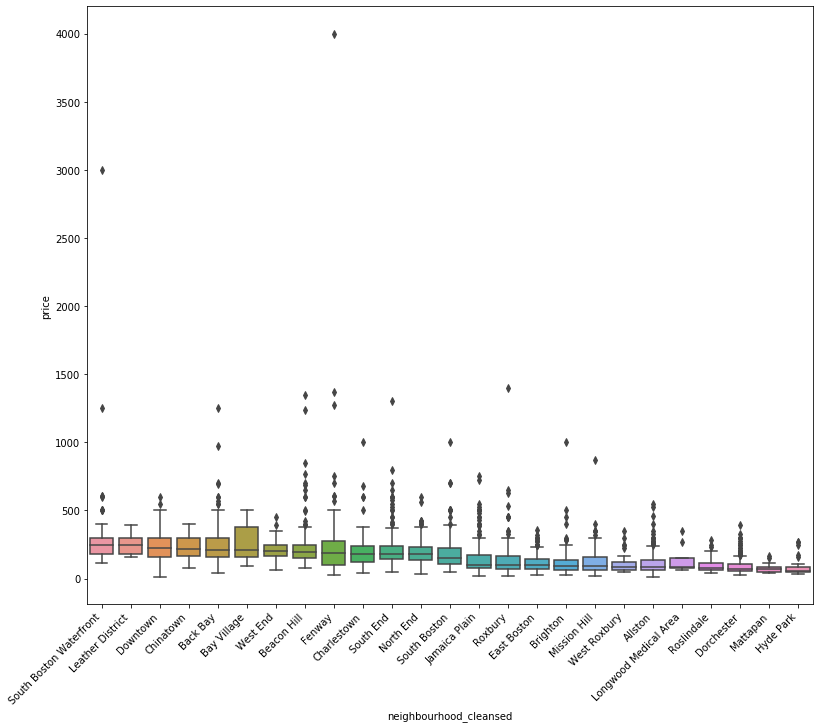

In [151]:
# Create the plot
sns.boxplot(x='neighbourhood_cleansed', y='price', data=listings_price_loc, order=my_order)
fig = plt.gcf()
fig.set_size_inches(13, 11)
plt.xticks(rotation=45, ha='right')
plt.savefig(r'C:\Users\nik\Boston_AirBnB\Charts\6.png', dpi=300)
plt.show()

We have generated two maps and the cheapest listings are located Allston, Mission Hill and Jamaica Plain neighbourhoods, but the cheapest one is located Downtown. The top five most expensive are located in Fenway, Roxbury, South Boston Waterfront, Beacon Hill neighbourhoods, and the most expensive one is in Fenway.

South Boston Waterfront has the highest median price with 83 listings, and Hyde Park has the lowest median price with 31 listings.


## Price and Property type

In [152]:
listings_price['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [153]:
# Create the order for plotting by median price and sort values
my_order = listings_price.groupby(by=['property_type'])['price'].median().sort_values(ascending=False).index

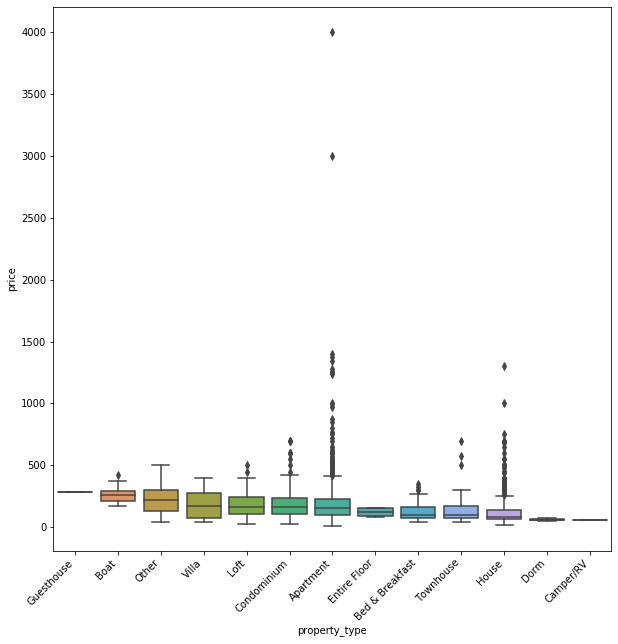

In [154]:
# Create the plot
sns.boxplot(x='property_type', y='price', data=listings_price, order=my_order)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.xticks(rotation=45, ha='right')
plt.savefig(r'C:\Users\nik\Boston_AirBnB\Charts\7.png', dpi=300)
plt.show()

Here it seems that the Guesthouse property type has the highest median price but it has only one listing, and property types such as Villa, Entire Floor, Dorm, Camper/RV they have less than 10 listings. Apartment with 2612 listings, House with 562, and Condominium with 231 are the property types with above 100 listings.


## Price and Room type

In [155]:
listings_price['room_type'].value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

In [156]:
# Create the order for plotting by median price and sort values
my_order = listings_price.groupby(by=['room_type'])['price'].median().sort_values(ascending=False).index

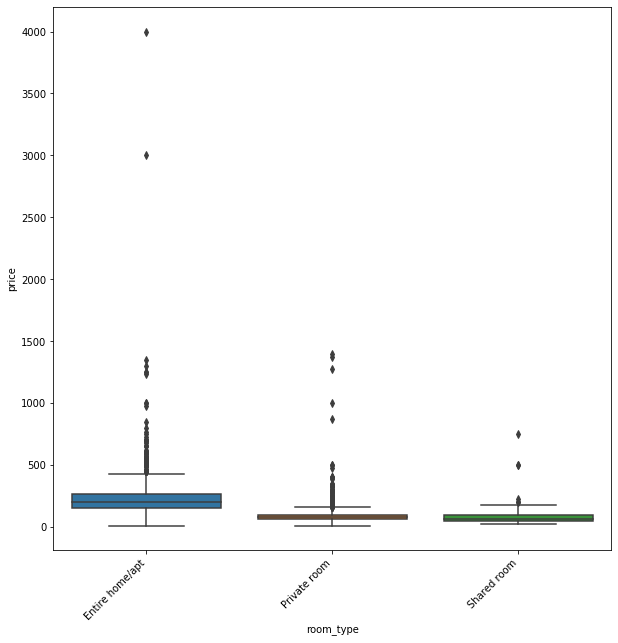

In [157]:
# Create the plot
sns.boxplot(x='room_type', y='price', data=listings_price, order=my_order)
fig = plt.gcf()
fig.set_size_inches( 10, 10)
plt.xticks(rotation=45, ha='right')
plt.savefig(r'C:\Users\nik\Boston_AirBnB\Charts\8.png', dpi=300)
plt.show()

There are three room types: Entire home/apt with 2127 listings, Private room with 1378 listings, and Shared room with 80 listings. Entire home/apt has a higher median price comparing to other types.


## Price and Bed type

In [158]:
listings_price['bed_type'].value_counts()

Real Bed         3453
Futon              51
Airbed             40
Pull-out Sofa      31
Couch              10
Name: bed_type, dtype: int64

In [159]:
# Create the order for plotting by median price and sort values
my_order = listings_price.groupby(by=['bed_type'])['price'].median().sort_values(ascending=False).index

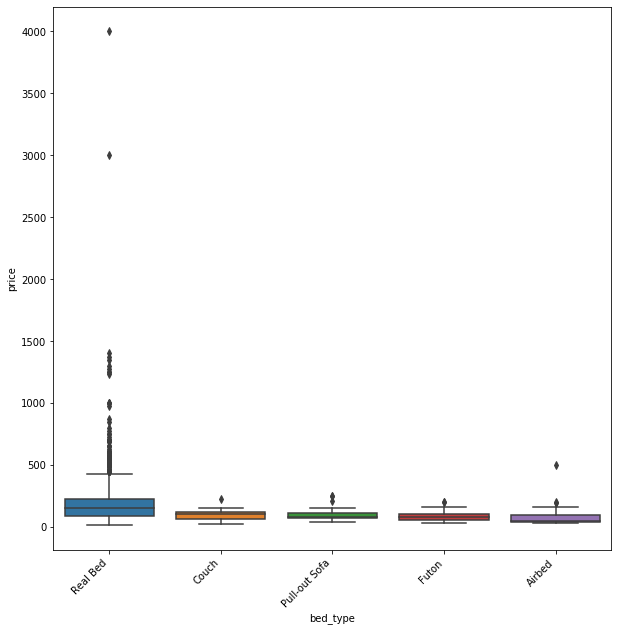

In [160]:
# Create the plot
sns.boxplot(x='bed_type', y='price', data=listings_price, order=my_order)
fig = plt.gcf()
fig.set_size_inches( 10, 10)
plt.xticks(rotation=45, ha='right')
plt.savefig(r'C:\Users\nik\Boston_AirBnB\Charts\9.png', dpi=300)
plt.show()

Again here the majority of the listing are having a real bed and higher median price from the other bed types.

<a id='r'></a>
# 5. Results

South Boston Waterfront is the most expensive neighbourhood and the cheapest is Hyde Park. The cheapest listings are located Allston, Mission Hill and Jamaica Plain neighbourhoods, but the cheapest one is located Downtown. The top five most expensive are located in Fenway, Roxbury, South Boston Waterfront, Beacon Hill neighbourhoods, and the most expensive one is in Fenway.

South Boston Waterfront has the highest median price with 83 listings, and Hyde Park has the lowest median price with 31 listings. Apartments are dominating the property type. Entire home/apt with 2127 listings, Private room with 1378 listings, and Shared room with 80 listings. Entire home/apt has a higher median price comparing to other types. The room type Entire home/apt has the highest mean price, and of course, the real bed is what someone would prefer to stay in!